### scikit-learn: machine learning in Python (https://scikit-learn.org/stable/)

## Comparing models

In [1]:
import sklearn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### For classification

In [13]:
X = tips.drop("sex", axis = 1)
y = tips["sex"]

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
X['smoker'] = lb.fit_transform(X['smoker'])
X['day'] = lb.fit_transform(X['day'])
X['time'] = lb.fit_transform(X['time'])

y = lb.fit_transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
print(y_test)

[1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1
 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1]


In [4]:
from sklearn.svm import SVC
clf1 = SVC(gamma="auto")
clf1.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [5]:
pred1 = clf1.predict(X_test)
pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1])

In [9]:
from sklearn.neighbors import KNeighborsClassifier
clf2 = KNeighborsClassifier(n_neighbors=5)
clf2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [10]:
pred2 = clf2.predict(X_test)
pred2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1])

https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
acc1 = accuracy_score(pred1, y_test)
acc2 = accuracy_score(pred2, y_test)
print("SVC Accuracy: {}; KNN Accuracy: {}".format(acc1, acc2))

# clr1 = classification_report(pred1, y_test)
# clr2 = classification_report(pred2, y_test)
# print("SVC Report: {}".format(clr1))
# print("KNN Report: {}".format(clr2))

cmat1 = confusion_matrix(pred1, y_test)
cmat2 = confusion_matrix(pred2, y_test)
print("SVC Matrix: \n{}".format(cmat1))
print("KNN Matrix: \n{}".format(cmat2))

SVC Accuracy: 0.7027027027027027; KNN Accuracy: 0.6756756756756757
SVC Matrix: 
[[ 5  1]
 [21 47]]
KNN Matrix: 
[[ 6  4]
 [20 44]]


### For regression

#### Regression metrics
##### Mean Absolute Error (MAE)

$MAE=\frac{1}{n}\sum\limits^{n}_{i=1}|y_i - \hat{y}_i|$

##### Mean Square Error (MSE)

$MSE=\frac{1}{n}\sum\limits^{n}_{i=1}(y_i - \hat{y}_i)^2$

##### Root Mean Square Error (RMSE)

$RMSE=\sqrt{\frac{1}{n}\sum\limits^{n}_{i=1}(y_i - \hat{y}_i)^2}$

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [14]:
X = tips.drop('tip', axis = 1)
y = tips['tip']

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
X['sex'] = lb.fit_transform(X['sex'])
X['smoker'] = lb.fit_transform(X['smoker'])
X['day'] = lb.fit_transform(X['day'])
X['time'] = lb.fit_transform(X['time'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [15]:
from sklearn.linear_model import ElasticNet
reg1 = ElasticNet()
reg1.fit(X_train, y_train)
pred1 = reg1.predict(X_test)
pred1

array([2.94128758, 5.32430461, 2.91846337, 1.85671474, 4.46205652,
       2.31404436, 2.43323748, 3.06132604, 2.29713754, 4.00641758,
       2.41125861, 2.79504354, 3.33268059, 4.18816595, 2.9928534 ,
       5.07746496, 2.51269956, 2.26078786, 2.65218087, 2.57018277,
       3.12303595, 4.72580299, 3.69786802, 2.70290135, 3.76295929,
       2.97932794, 2.37406359, 2.3782903 , 2.32249778, 2.32080709,
       2.73079761, 1.89813646, 3.24561044, 3.2735067 , 2.51692627,
       3.54993329, 5.32937666, 2.72065351, 2.3782903 , 2.71980817,
       2.42732009, 2.20584068, 3.01060557, 4.27270008, 2.13229599,
       3.62516867, 2.98947203, 3.78493817, 2.1754084 , 2.90493791,
       2.42224805, 2.70712805, 3.3166191 , 1.96914513, 3.65729163,
       2.15427486, 4.57617759, 2.11707985, 2.89141245, 2.5769455 ,
       4.18647527, 5.3158512 , 2.35631143, 3.35719549, 4.22451562,
       3.06808877, 2.54397719, 2.74939512, 2.13905872, 2.14413077,
       2.58032686, 2.67500508, 2.29882822, 2.3537754 ])

In [16]:
from sklearn.ensemble import GradientBoostingRegressor
reg2 = GradientBoostingRegressor()
reg2.fit(X_train, y_train)
pred2 = reg2.predict(X_test)
pred2

array([ 2.79928685, 10.77433693,  2.95938006,  3.75078949,  4.26054048,
        1.98839491,  2.27938657,  3.35411508,  2.23194256,  2.71689957,
        2.27938657,  3.2176917 ,  2.8059341 ,  4.98560523,  2.85560201,
        2.90898139,  2.32530994,  2.32184396,  2.83473811,  2.53813475,
        3.10851565,  4.92426651,  3.59230201,  2.67065197,  5.80980399,
        3.2471535 ,  2.32635137,  2.53808044,  1.58114197,  1.42844204,
        2.7471743 ,  1.97387915,  3.02314711,  3.90789162,  2.17937427,
        2.94638647, 10.77433693,  2.59754435,  2.50050518,  2.65100371,
        2.32635137,  1.68360833,  3.31535013,  4.32500577,  1.73099483,
        3.18199816,  2.88521328,  2.94706003,  1.93243346,  2.77963859,
        2.27938657,  2.65100371,  2.5644869 ,  2.02237003,  3.63708118,
        1.73099483,  4.46568195,  1.68360833,  2.70311626,  2.42802838,
        4.80149441, 11.27228474,  2.03183021,  4.39831506,  4.80149441,
        3.10851565,  2.5705646 ,  2.17608615,  2.01615121,  1.68

In [17]:
from sklearn.linear_model import Lasso
reg3 = Lasso(alpha=0.1)
reg3.fit(X_train, y_train)
pred3 = reg3.predict(X_test)
pred3

array([2.99458303, 5.48883717, 2.85987142, 1.68652164, 4.51493296,
       2.25561894, 2.37477922, 3.2264821 , 2.23871678, 3.94752587,
       2.3528064 , 2.96027297, 3.27397451, 4.35301154, 3.26992201,
       5.13017184, 2.45421941, 2.20237712, 2.59366228, 2.51168677,
       3.06438764, 5.00239414, 3.75095501, 2.75626247, 4.15170941,
       3.14450659, 2.31562164, 2.31984718, 2.26407003, 2.26237981,
       2.78415105, 1.83982563, 3.18692835, 3.4386043 , 2.45844495,
       3.49116736, 5.49390782, 2.66211606, 2.31984718, 2.66127095,
       2.36886346, 2.14744507, 3.06388191, 4.32562869, 2.07392065,
       3.67827569, 3.04275421, 3.83800117, 2.11702117, 2.84634968,
       2.36379281, 2.64859433, 3.36981114, 1.79892105, 3.71038981,
       2.09589346, 4.74091628, 2.0587087 , 2.83282795, 2.51844764,
       4.35132132, 5.70417346, 2.29787436, 3.52227003, 4.3893512 ,
       3.0094556 , 2.48548842, 2.91463712, 2.08068151, 2.08575216,
       2.52182807, 2.7283739 , 2.24040699, 2.29533904])

In [18]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
reg4 = GaussianProcessRegressor(kernel = DotProduct() + WhiteKernel())
reg4.fit(X_train, y_train)
pred4 = reg4.predict(X_test)
pred4

array([3.05130523, 5.42156618, 2.70603851, 1.41023718, 4.43171401,
       2.26520489, 2.36854665, 3.52142392, 2.12677599, 3.74172072,
       2.34949072, 3.2286688 , 3.02313067, 4.28074964, 3.76621615,
       5.09973256, 2.51000851, 2.22971303, 2.43312987, 2.62173234,
       2.96660957, 5.14345954, 3.70726885, 2.90650697, 4.52040829,
       3.45954015, 2.25535698, 2.05204672, 2.25268761, 2.1878639 ,
       2.86880809, 1.97717549, 3.07288301, 3.77795426, 2.28680665,
       3.34741641, 5.4259637 , 2.40008256, 2.14446057, 2.61700661,
       2.30153096, 1.95373413, 3.2153287 , 4.11324077, 2.04574179,
       3.68627647, 3.09308169, 3.91721225, 2.21757333, 2.62321705,
       2.35901869, 2.51359896, 3.43860707, 1.48556841, 3.73397393,
       2.06479772, 4.77293176, 1.87677751, 2.76578942, 2.33884399,
       4.40452692, 6.08443975, 2.08419394, 3.68553216, 4.43750833,
       2.91896976, 2.38282746, 3.1890911 , 2.09364391, 1.90023096,
       2.56864213, 2.72802151, 2.03435536, 2.29965215])

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("REG1:", mean_absolute_error(y_test, pred1), mean_squared_error(y_test, pred1), np.sqrt(mean_squared_error(y_test, pred1)))
print("REG2:", mean_absolute_error(y_test, pred2), mean_squared_error(y_test, pred2), np.sqrt(mean_squared_error(y_test, pred2)))
print("REG3:", mean_absolute_error(y_test, pred3), mean_squared_error(y_test, pred3), np.sqrt(mean_squared_error(y_test, pred3)))
print("REG4:", mean_absolute_error(y_test, pred4), mean_squared_error(y_test, pred4), np.sqrt(mean_squared_error(y_test, pred4)))

REG1: 0.7660070792443283 1.115718985625195 1.056275998792548
REG2: 0.9112665955186925 1.9445644245249523 1.3944763979806012
REG3: 0.7430718714117783 1.0666680750216435 1.0327962408053408
REG4: 0.7849578507063836 1.158058957583082 1.076131477833021


## Finding optimal parameters

In [20]:
from sklearn.neighbors import KNeighborsRegressor
ks = np.arange(1,31)
results = np.zeros(30)
for k in ks:
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    results[k-1] = np.sqrt(mean_squared_error(y_test, y_pred))
best_k = results.argmin() + 1
low_rmse = results.min()
print ("Best number of neighbors is {} with RMSE equals to {}".format(best_k, low_rmse))    

Best number of neighbors is 21 with RMSE equals to 1.149155019699308


Text(0.5, 1.0, 'RMSE vs Number of neighbors')

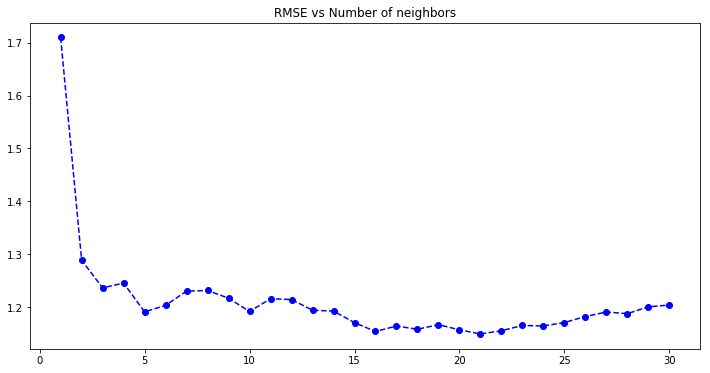

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(ks, results, marker='o', linestyle='--', color='blue')
plt.title("RMSE vs Number of neighbors")

### Cross-validation - http://scikit-learn.org/stable/modules/model_evaluation.html

In [22]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': list(range(1, 31))}
knn = KNeighborsRegressor()
grid = GridSearchCV(
    knn,
    parameters,
    cv = 10,
    scoring = 'neg_mean_squared_error',
    return_train_score = True,
    refit = True
)
grid.fit(X_train, y_train)
# grid.cv_results_
grid.best_params_

{'n_neighbors': 27}

Text(0, 0.5, 'RMSE 10-CV')

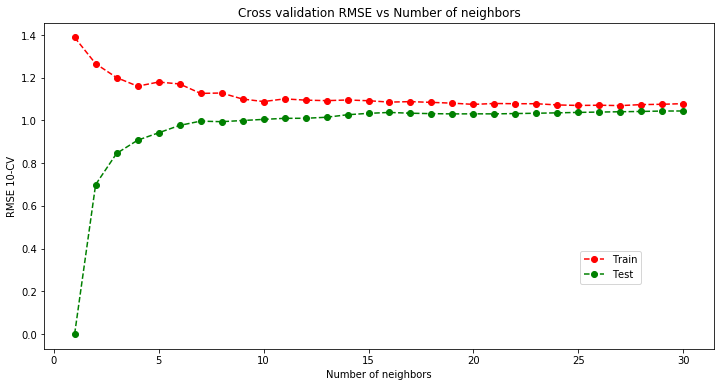

In [23]:
# Training errors
mean_cv_train = grid.cv_results_['mean_train_score']
rmse_cv_train = np.sqrt(np.abs(mean_cv_train))

# Test errors
mean_cv_test = grid.cv_results_['mean_test_score']
rmse_cv_test = np.sqrt(np.abs(mean_cv_test))

# Plotting
plt.figure(figsize=(12,6))
plt.plot(ks,rmse_cv_test, marker = 'o', linestyle = '--', color = 'red')
plt.plot(ks,rmse_cv_train, marker = 'o', linestyle = '--', color = 'green')
plt.legend(['Train', 'Test'], loc = (0.8, 0.2))
plt.title("Cross validation RMSE vs Number of neighbors")
plt.xlabel('Number of neighbors')
plt.ylabel('RMSE 10-CV')

In [24]:
best_knn = grid.best_estimator_
best_pred = best_knn.predict(X_test)
np.sqrt(mean_squared_error(y_test, best_pred))

1.190701523584485